In [1]:
# prompt: armar un dataframe de al menos 100 filas con datos random con apellido y nombre, nro_dni, materias de educacion nivel secundario de la argentina que contenga las siguientes columnas: materia escolar, nota 1er Trimestre, nota 2do Trimestre, nota 3er Trimestre, Faltas a clases.

import pandas as pd
import numpy as np
import random

# Define possible values for columns
materias = ['Matemática', 'Lengua', 'Historia', 'Geografía', 'Ciencias Naturales', 'Física', 'Química', 'Biología', 'Educación Física', 'Inglés', 'Arte', 'Música']
apellidos = ['Gómez', 'Rodríguez', 'Pérez', 'García', 'López', 'Martínez', 'González', 'Sánchez', 'Ramírez', 'Torres']
nombres = ['Juan', 'Ana', 'Pedro', 'María', 'José', 'Laura', 'Carlos', 'Sofía', 'Diego', 'Isabella']

# Create DataFrame with 100 rows
df = pd.DataFrame(index=range(100))

# Generate random data
df['Apellido'] = np.random.choice(apellidos, 100)
df['Nombre'] = np.random.choice(nombres, 100)
df['Nro_DNI'] = np.random.randint(10000000, 99999999, 100)  # DNI between 10 million and 99 million
df['Materia'] = np.random.choice(materias, 100)
df['Nota 1er Trimestre'] = np.random.randint(1, 11, 100)
df['Nota 2do Trimestre'] = np.random.randint(1, 11, 100)
df['Nota 3er Trimestre'] = np.random.randint(1, 11, 100)
df['Faltas a clases'] = np.random.randint(0, 20, 100)


print(df.head()) # Display first 5 rows

   Apellido Nombre   Nro_DNI           Materia  Nota 1er Trimestre  \
0     López  María  36796545  Educación Física                   9   
1  Martínez  Sofía  15132985              Arte                   3   
2   Ramírez  Laura  96249247         Geografía                   7   
3  González   Juan  38368287              Arte                   7   
4     Pérez  Diego  81595642            Lengua                   2   

   Nota 2do Trimestre  Nota 3er Trimestre  Faltas a clases  
0                   8                   1                1  
1                   5                   3               12  
2                   9                   7                6  
3                   1                   9               10  
4                   6                   1               19  


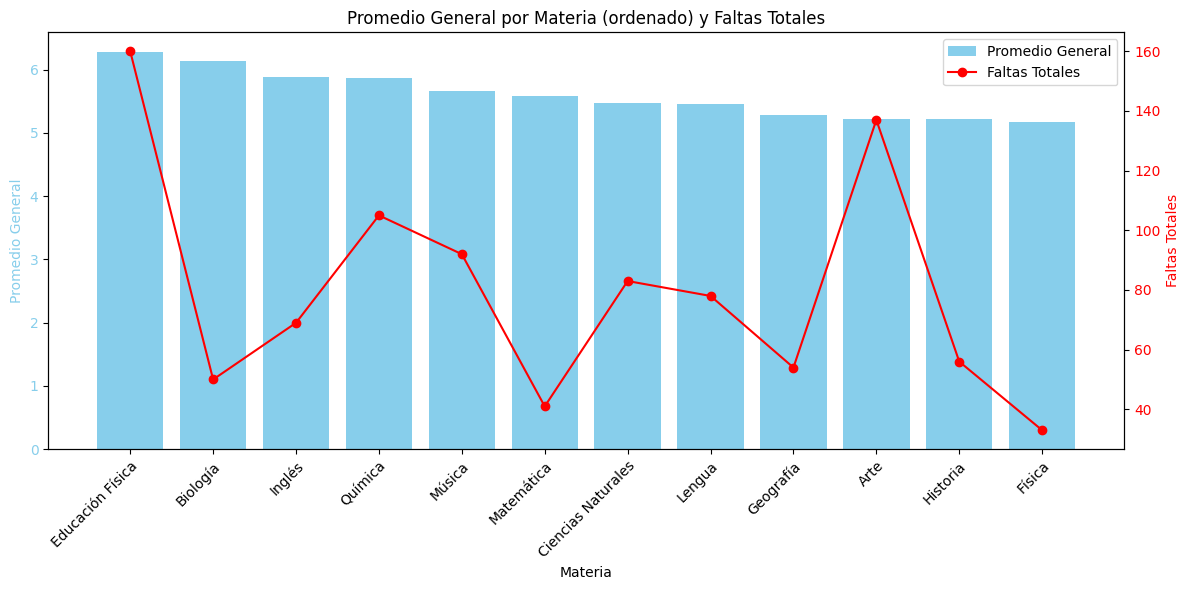

In [3]:
# prompt: Armar grafico de barras con Promedio general de cada materia, ordenados de mayor a menor, agregar las faltas como valor contrastable en dos ejes. Agregar las leyendas que ayuden a la interpretación.

import pandas as pd
import matplotlib.pyplot as plt

# Calculate the average grade for each subject
average_grades = df.groupby('Materia').agg({'Nota 1er Trimestre': 'mean', 'Nota 2do Trimestre': 'mean', 'Nota 3er Trimestre': 'mean'})
average_grades['Promedio General'] = average_grades.mean(axis=1)

# Calculate total absences per subject
total_absences = df.groupby('Materia')['Faltas a clases'].sum()

# Sort subjects by average grade in descending order
average_grades = average_grades.sort_values('Promedio General', ascending=False)
total_absences = total_absences.loc[average_grades.index] # Match order

# Create the bar chart
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.bar(average_grades.index, average_grades['Promedio General'], color='skyblue', label='Promedio General')
ax1.set_xlabel('Materia')
ax1.set_ylabel('Promedio General', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_title('Promedio General por Materia (ordenado) y Faltas Totales')


ax2 = ax1.twinx()  # Create a second y-axis
ax2.plot(total_absences.index, total_absences, color='red', marker='o', label='Faltas Totales')
ax2.set_ylabel('Faltas Totales', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Rotate x-axis labels for better readability
plt.setp(ax1.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Add legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

plt.tight_layout()
plt.show()